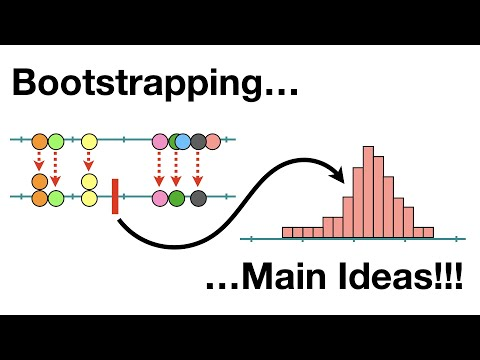

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard error of the mean is due to bootstrapping. Since we are taking a random sample, it may produce bias and will not always produce the same value for the mean. So, the standard error of the mean is the variability of the sample mean calculated by bootstrapping. 

If we take the standard deviation of the bootstrapped distribution, this will give us an estimate of the variability of the sample means calculated, which is what we want, and hence, in order to calculate the standard error of the mean of drug efficacy, a st


2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

We first need to calculate the standard error of the mean by calculating the stnadard deviation of the bootstrapped distribution. 
Multiply this by 1.96 
Add and subtract this value to the mean to get the 95% confidence interval. This is similar to the calculation of adding and subtracting two times the standard deviation from the mean to get 95% of the normal distribution. 

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

You must generate multiple bootstrap samples and make a distribution of the means generated from each sample, sorting them from smallest to largest. 
Take the 2.5th percentile and the 97.5th percentile to get the 95% confidence interval. 

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [15]:
import numpy as np

def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95, statistic_function=np.mean):
    # In order to change this, you can change statistic_function from np.mean to np.median, as this is part of 
    # the numpy functions, or any functions.
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap, len(data)), replace=True)
    
    bootstrap_statistics = np.array([statistic_function(sample) for sample in bootstrap_samples])

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The population parameter is the actual value calculated using all data from the population, without bias. 
A sample statistic is what we are using to estimate the population parameter. If the actual population parameter is within the confidence interval, then it is a good sample. The confidence interval shows the range of the sample statistic.


6. 

What is the process of bootstrapping?
You take random samples by using repeated random sampling until you reach the required sample size. You take multiple samples and calculate the sample statistic for all of these samples, and add these means to a histogram of the bootstrap distribution. 


What is the main purpose of bootstrapping?
Estimates confidence intervals or standard errors for the original population parameter by looking at the spread of the statistics from the bootstrapped data.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Take a bootstrapped sample as explained above, of size n:
 - Take random samples by using repeated random sampling until you reach the required sample size. 
 - Take multiple samples and calculate the sample statistic for all of these samples
 - Add these means to a histogram of the bootstrap distribution
 If the hypothesized guess is within the bootstrapped confidence interval for the sample statistic, it is a plausible guess. 

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If it overlaps, or includes 0, then the null is not rejected because it suggests 0 is a plausible mean. The null usually assumes the mean = 0, so if the interval includes 0, then the null cannot be rejected. 
If the confidence interval doesn't include 0, then we can reject the null, as the evidence provided by the dataset shows the true effect/value of the parameter is NOT 0. 


8.

In [1]:
import pandas as pd

data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv('PatientHealthData.csv', index=False)


In [2]:
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [3]:
df['InitialHealthScore']

0    84
1    78
2    83
3    81
4    81
5    80
6    79
7    85
8    76
9    83
Name: InitialHealthScore, dtype: int64

In [4]:
df['FinalHealthScore']

0    86
1    86
2    80
3    86
4    84
5    86
6    86
7    82
8    83
9    84
Name: FinalHealthScore, dtype: int64

PROBLEM INTRODUCTION

We are comparing patients' initial and final health scores to see whether there is any significant effect of the treatment on patients' health. We will be comparing the mean, median and standard deviation of the health scores, as well as drawing visualizations and box plots.

We are looking at the overall trends as well, to see whether there are meaningful improvements. 

Why:
- Comparing the mean will show us the average health score before and after the treatment
- Comparing the median will account for any outliers who may have had worse or better health due to external reasons
- Comparing the standard deviation will show us if the drug provides consistent results for most of the patients in the trial, or if it erratically only works on a few patients.

Explanation of the Null Hypothesis of "No Effect"

The null hypothesis says the treatment has no impact on the patients' health, suggesting a very small (insignificant) difference between the initial and final health scores. 
The alternate hypothesis says that the drug does work, to some extent.

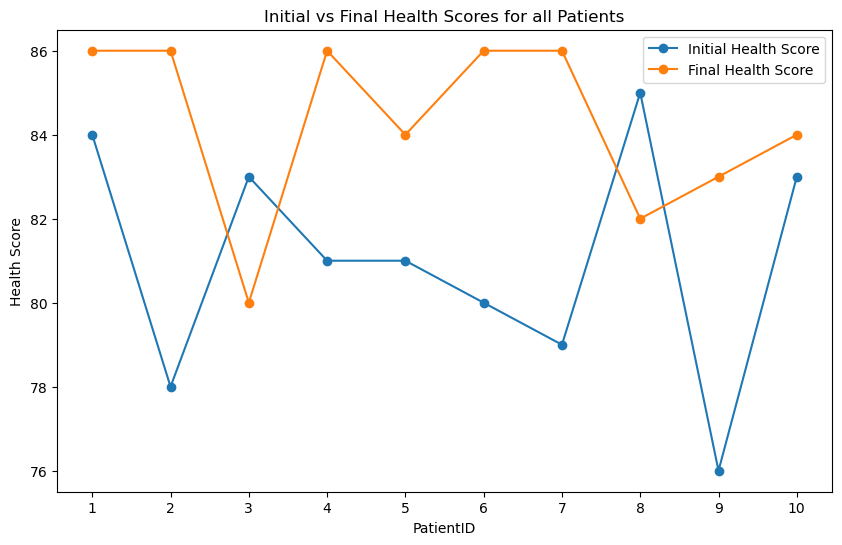

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 

data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv('PatientHealthData.csv', index=False)

plt.figure(figsize=(10,6))
plt.plot(df["PatientID"], df["InitialHealthScore"], label="Initial Health Score", marker = 'o')
plt.plot(df["PatientID"], df["FinalHealthScore"], label="Final Health Score", marker = 'o')
plt.title('Initial vs Final Health Scores for all Patients')
plt.xlabel('PatientID')
plt.ylabel('Health Score')
plt.xticks(df["PatientID"])
plt.legend()
plt.show()
plt.savefig('health_scores_plot.png', format='png')


This shows the overall visual differences: initial health score is much more erratic, and final health score is generally higher than initial health score in all cases, except for PatientID3, and PatientID9 (the orange line is below the blue line).

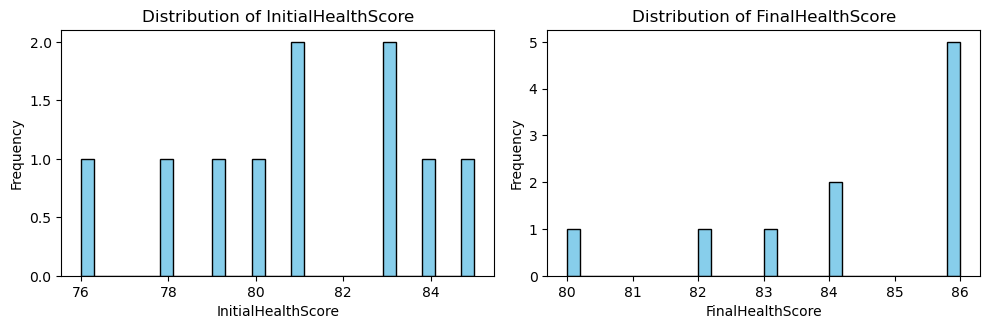

       PatientID       Age  InitialHealthScore  FinalHealthScore
count   10.00000  10.00000           10.000000         10.000000
mean     5.50000  38.40000           81.000000         84.300000
std      3.02765   8.30261            2.828427          2.110819
min      1.00000  26.00000           76.000000         80.000000
25%      3.25000  33.25000           79.250000         83.250000
50%      5.50000  38.00000           81.000000         85.000000
75%      7.75000  44.00000           83.000000         86.000000
max     10.00000  52.00000           85.000000         86.000000


<Figure size 640x480 with 0 Axes>

In [13]:
# Display basic summary statistics of the dataset
summary_stats = df.describe()

import matplotlib.pyplot as plt

columns_to_visualize = ['InitialHealthScore', 'FinalHealthScore']

# Creating histograms for each column
plt.figure(figsize=(10, 6))

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('drugs.png', format='png')

plt.show()

plt.savefig('health_scores_plot.png', format='png')

# Display the summary statistics for the user
print(summary_stats)

The above graphs show the two metrics we wish to compare - initial and final health score. As seen above, there is generally a concentration in the '86' health score, showing that the drug worked, and the largest frequency is in this group.

A more detailed explanation of mean, median, std and the comparison between these values for initial and final health score is contained below. 


In [8]:
#Summary statistics
initial_mean = df["InitialHealthScore"].mean()
final_mean = df["FinalHealthScore"].mean()

initial_median = df["InitialHealthScore"].median()
final_median = df["FinalHealthScore"].median()

initial_std = df["InitialHealthScore"].std()
final_std = df["FinalHealthScore"].std()

# Display summary statistics
print(f"Initial Health Score: Mean = {initial_mean}, Median = {initial_median}, Std Dev = {initial_std}")
print(f"Final Health Score: Mean = {final_mean}, Median = {final_median}, Std Dev = {final_std}")


Initial Health Score: Mean = 81.0, Median = 81.0, Std Dev = 2.8284271247461903
Final Health Score: Mean = 84.3, Median = 85.0, Std Dev = 2.1108186931983415


This shows that overall, the drug did improve health scores, as the final health score mean was higher than the original health score mean. The median was also higher, and the overall health scores after the drug were closer together and less spread out, as seen by the lower standard deviation (2.11) compared to before the drug (2.83). This is also seen in the boxplot below. 

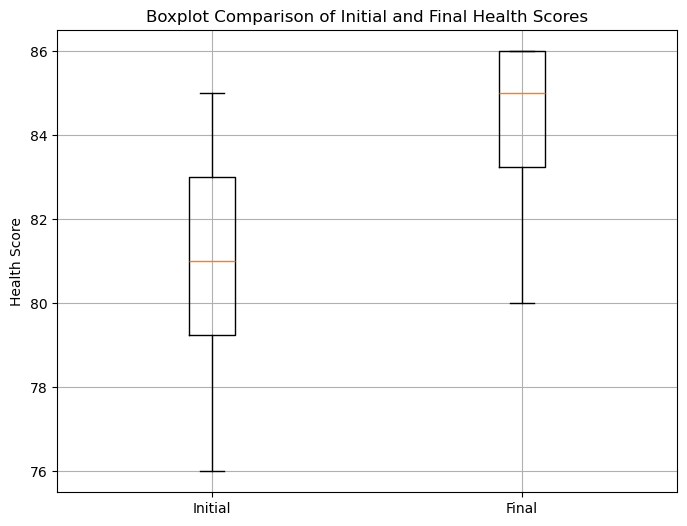

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot([df["InitialHealthScore"], df["FinalHealthScore"]], labels=["Initial", "Final"])
plt.title('Boxplot Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()
plt.savefig('BOXPLOT_COMPARISON.PNG', format='png')

This shows the range of initial health scores is much more spread out, and it also has a larger IQR, whereas the final health scores are much more consistent as seen by the smaller range and IQR. 

Conclusion regarding a Null Hypothesis of "no effect":

Since the final mean, median, and visualizations of the health scores have significantly improved, we can reasonably conclude that the treatment had an effect, rejecting the null hypothesis.
However, if we decide that there is 'no effect' (this depends on the significance level decided), then this will suggest the drug had little to no effect, and that the improvements in Health Scores seen for the 8 patients whose score improved could have been due to the Placebo effect or due to lifestyle changes. 


How to improve results:
- Use a larger sample size, sample size of 10 is very small and may be biased
- Repeat them over time or perhaps observe the patients for longer to see long term effects and effects over different trials. 

9. Yes

CHAT SUMMARY

In this session, we discussed several statistical concepts:

1. **Standard Error of the Mean (SEM)** vs. **Standard Deviation**: SEM measures the precision of the sample mean as an estimate of the population mean, while standard deviation measures the spread of individual data points around the mean in the original dataset.
   
2. **Using SEM for Confidence Intervals**: A 95% confidence interval can be constructed by multiplying the SEM by 1.96, then adding and subtracting this from the sample mean.

3. **Bootstrapped Confidence Intervals**: Instead of relying on the standard error, bootstrapped confidence intervals are created by resampling the data and using percentiles to estimate the interval.

4. **Bootstrapping Process**: This involves resampling the data with replacement, calculating a statistic for each resample, and using the resulting distribution to estimate parameters like the mean or median.

5. **Hypothesis Testing and Confidence Intervals**: A confidence interval overlapping zero suggests that the null hypothesis (e.g., no effect) is plausible, while intervals that exclude zero lead to rejection of the null hypothesis.

https://chatgpt.com/share/66ff6593-d60c-8010-a8b8-1fbd0f52c6e6